In [53]:
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import os
import joblib
from dataprep.eda import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam

In [34]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train.flow_from_directory('C:/Users/Mua/Downloads/data/brain mri/brain_tumor_train/',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [37]:
test = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_set = test.flow_from_directory('C:/Users/Mua/Downloads/data/brain mri/brain_tumor test',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [38]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [39]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(input_shape=(64,64)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(2,activation='softmax')

])

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(training_set,validation_data=testing_set, epochs=10)

Epoch 1/10

127/127 [==============================] - 18s 120ms/step - loss: 0.7074 - accuracy: 0.6522 - val_loss: 0.6546 - val_accuracy: 0.6719

Epoch 2/10

127/127 [==============================] - 13s 101ms/step - loss: 0.6561 - accuracy: 0.6759 - val_loss: 0.5861 - val_accuracy: 0.6877

Epoch 3/10

127/127 [==============================] - 13s 102ms/step - loss: 0.5993 - accuracy: 0.6877 - val_loss: 0.5494 - val_accuracy: 0.7194

Epoch 4/10

127/127 [==============================] - 13s 102ms/step - loss: 0.5536 - accuracy: 0.7036 - val_loss: 0.5542 - val_accuracy: 0.7470

Epoch 5/10

127/127 [==============================] - 13s 99ms/step - loss: 0.6087 - accuracy: 0.6640 - val_loss: 0.5769 - val_accuracy: 0.7075

Epoch 6/10

127/127 [==============================] - 13s 99ms/step - loss: 0.6205 - accuracy: 0.6285 - val_loss: 0.5750 - val_accuracy: 0.6877

Epoch 7/10

127/127 [==============================] - 12s 98ms/step - loss: 0.5923 - accuracy: 0.6957 - val_loss: 0.575

In [42]:
joblib.dump(model,"Brain Tumor MRI Dataset detection.joblob")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:

...layers\conv2d

......vars

.........0

.........1

...layers\conv2d_1

......vars

.........0

.........1

...layers\dense

......vars

.........0

.........1

...layers\dense_1

......vars

.........0

.........1

...layers\dense_2

......vars

.........0

.........1

...layers\dense_3

......vars

.........0

.........1

...layers\dropout

......vars

...layers\flatten

......vars

...layers\max_pooling2d

......vars

...layers\max_pooling2d_1

......vars

...metrics\mean

......vars

.........0

.........1

...metrics\mean_metric_wrapper

......vars

.........0

.........1

...optimizer

......vars

.........0

.........1

.........10

.........11

.........12

.........13

.........14

.........15

.........16

.........17

.........18

.........19

.........2

.........20

.........21

.........22

.........23

.........24

.........3

.........4

.........5

.........6

.........7

.........8

.........9

...va

['Brain Tumor MRI Dataset detection.joblob']

In [43]:
model = joblib.load("Brain Tumor MRI Dataset detection.joblob")

Keras model archive loading:

File Name                                             Modified             Size

config.json                                    2023-03-27 14:08:00         4130

metadata.json                                  2023-03-27 14:08:00           64

variables.h5                                   2023-03-27 14:08:00     19901624

Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:

...layers\conv2d

......vars

.........0

.........1

...layers\conv2d_1

......vars

.........0

.........1

...layers\dense

......vars

.........0

.........1

...layers\dense_1

......vars

.........0

.........1

...layers\dense_2

......vars

.........0

.........1

...layers\dense_3

......vars

.........0

.........1

...layers\dropout

......vars

...layers\flatten

......vars

...layers\max_pooling2d

......vars

...layers\max_pooling2d_1

......vars

...metrics\mean

......vars

.........0

.........1

...metrics\mean_metric_wrapper

......vars

.........0

....

In [44]:
def getlabel(x):
    for i in training_set.class_indices:
        if training_set.class_indices[i] == x:
            return i

In [45]:
def predict_image(path):
    img = image.load_img(path,target_size=(64,64))
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    pred = [np.argmax(element) for element in p]
    print (plt.imshow(cv2.imread(path)))
    return getlabel(pred[0])

1/1 [==============================] - 0s 44ms/step

AxesImage(80,52.8;496x369.6)


'yes'

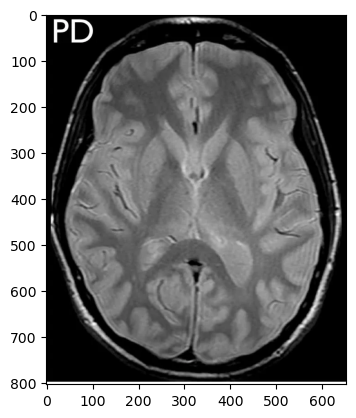

In [47]:
predict_image("C:/Users/Mua/Downloads/mri_brain.webp")

1/1 [==============================] - 0s 135ms/step

AxesImage(80,52.8;496x369.6)


'yes'

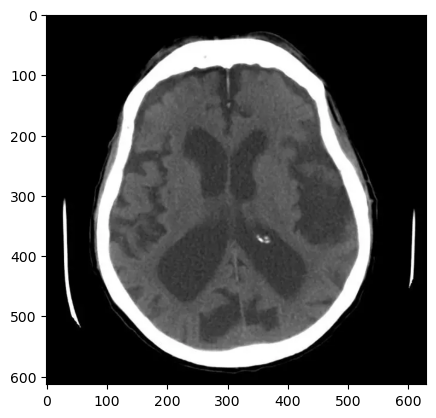

In [46]:
predict_image("C:/Users/Mua/Downloads/ri.webp")

1/1 [==============================] - 0s 48ms/step

AxesImage(80,52.8;496x369.6)


'yes'

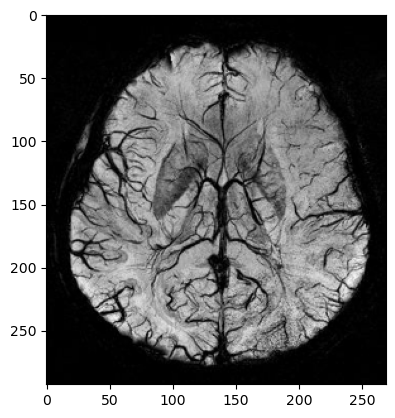

In [48]:
predict_image("C:/Users/Mua/Downloads/mri.png")

1/1 [==============================] - 0s 39ms/step

AxesImage(80,52.8;496x369.6)


'no'

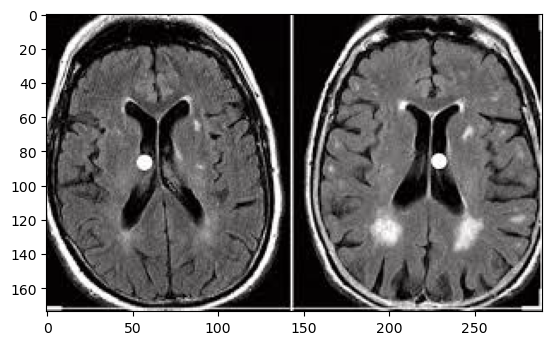

In [50]:
predict_image("C:/Users/Mua/Downloads/mrii.jpg")

In [51]:
model.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_4 (Conv2D)           (None, 62, 62, 64)        1792      

                                                                 

 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         

 2D)                                                             

                                                                 

 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     

                                                                 

 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         

 2D)                                                             

                                                                 

 flatten_2 (Flatten)         (None, 12544)             0         

                                                                 

 dense_8 (Dense)             (None, 12